# CLensPy Demo

This notebook demonstrates how to use CLensPy for weak lensing analysis.

## Overview

We will:
1. Generate lensing data using a simulated NFW profile
2. Discuss the bias of the halo model
4. Visualize the results

This is a practical example of how CLensPy can be used for real weak lensing analysis.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Import CLensPy modules
import sys
sys.path.append('../src')  # Adjust path as necessary
from clenspy.lensing.profile import LensingProfile
from clenspy.halo.nfw import NfwProfile
from clenspy.halo.bias import BiasModel

# Set up matplotlib
# plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Generate synthetic data
np.random.seed(42)  # For reproducible results

# True halo parameters (what we're trying to recover)
M200_true = 2e14  # Solar masses
c200_true = 6.0   # Concentration
z_lens = 0.25     # Lens redshift
z_source = 1.2    # Source redshift

print(f"True parameters:")
print(f"M200 = {M200_true:.1e} Msun")
print(f"c200 = {c200_true}")
print(f"z_lens = {z_lens}")
print(f"z_source = {z_source}")

# Define radial bins for observations
r_min, r_max = 0.075, 7.0  # Mpc
n_bins = 15
r_centers = np.logspace(np.log10(r_min), np.log10(r_max), n_bins)

True parameters:
M200 = 2.0e+14 Msun
c200 = 6.0
z_lens = 0.25
z_source = 1.2


In [7]:
from clenspy.config import DEFAULT_COSMOLOGY
lp = LensingProfile(
    cosmology=DEFAULT_COSMOLOGY, z_cluster=z_lens,
    m200=M200_true, concentration=c200_true, 
)
lp

PkGrid loaded cache file (camb): /Users/esteves/Documents/Projetos/CLensPy/src/data/pk_cache/f26cce84c16c200a7f9f60cd65e9e758.npz


LensingProfile(model=NFW, z_cluster=0.250, m200=2.00e+14, c=6.00), include_2halo=True)

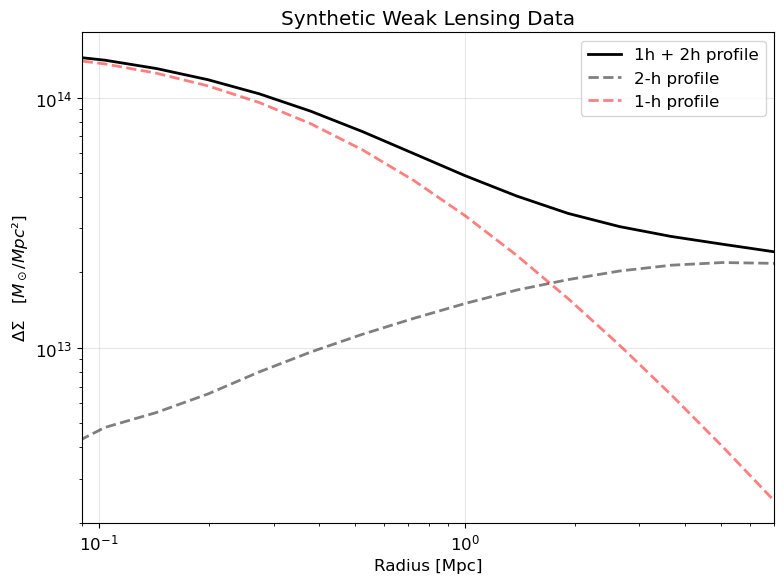

Synthetic data plotted successfully!


In [5]:
# Plot the synthetic data
fig, ax = plt.subplots(figsize=(8, 6))

# Plot true profile
deltasigma_halo_model = lp.deltasigma(r_centers)
delta_second_halo = lp.bias * lp.two_halo_profile.deltasigma(r_centers) * 1e12
delta_first_halo = lp.halo_profile.deltasigma(r_centers)

ax.loglog(r_centers, deltasigma_halo_model, 'k-', linewidth=2, label='1h + 2h profile')
# ax.loglog(r_centers, np.max([delta_first_halo,delta_second_halo],axis=0), 'k-', linewidth=2, label='1h + 2h profile')
ax.loglog(r_centers, delta_second_halo, 'k--', linewidth=2, label='2-h profile', alpha=0.5)
ax.loglog(r_centers, delta_first_halo, 'r--', linewidth=2, label='1-h profile', alpha=0.5)

ax.set_xlabel('Radius [Mpc]')
ax.set_ylabel(r'$\Delta \Sigma \quad [M_\odot /Mpc²]$')
ax.set_title('Synthetic Weak Lensing Data')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xlim(0.09, r_max)

plt.tight_layout()
plt.show()

print("Synthetic data plotted successfully!")